## Exploratory Data Analysis - Data Science Course - Week 5

### Set up the environment


In [175]:
from tqdm.auto import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib widget





Loading the car features dataset. This dataset contains a set of variables about cars and their features.

In [73]:
df_cars = pd.read_csv('../Datasets/carfeatures.csv')

### Data Familiarization

 - What are the data types?

 - Missing values?

 - How many entries?

 - Check the ranges of the data

 - Sample entries

 - Check unique values


In [74]:
df_cars.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [75]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [76]:
df_cars["Year"].min(),df_cars["Year"].max()

(1990, 2017)

In [77]:
df_cars["Make"].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

In [78]:
df_cars["Vehicle Style"].unique()

array(['Coupe', 'Convertible', 'Sedan', 'Wagon', '4dr Hatchback',
       '2dr Hatchback', '4dr SUV', 'Passenger Minivan', 'Cargo Minivan',
       'Crew Cab Pickup', 'Regular Cab Pickup', 'Extended Cab Pickup',
       '2dr SUV', 'Cargo Van', 'Convertible SUV', 'Passenger Van'],
      dtype=object)

### Descriptive statistics

 - Mean

 - Standard deviation

 - Median

 - Quantiles (e.g., quartiles)


In [79]:
df_cars["highway MPG"].mean()

26.637485311398354

In [80]:
df_cars["city mpg"].mean()

19.73325499412456

In [81]:
df_cars["highway MPG"].std()

8.863000766979432

In [82]:
df_cars["city mpg"].std()

8.987798160299246

In [83]:
df_cars["city mpg"].quantile(0.5)


18.0

Describing the data in terms of statistics

In [84]:
df_cars.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


### Distributions
Let's check the distributions (histograms) for different datasets and fields.

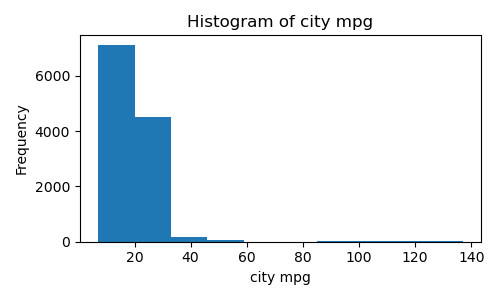

In [85]:
fig = plt.figure(figsize=(5, 3))
plt.hist(df_cars['city mpg'])
plt.xlabel('city mpg')
plt.ylabel('Frequency')
plt.title('Histogram of city mpg')
plt.tight_layout()
plt.show()

# bins np.arange(6, 40, 1.0)
# density plots

Let's try a different dataset (Iris dataset). This one contains measurements of different species of Iris flowers.

In [86]:
df_iris = pd.read_csv('../Datasets/iris.csv')
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


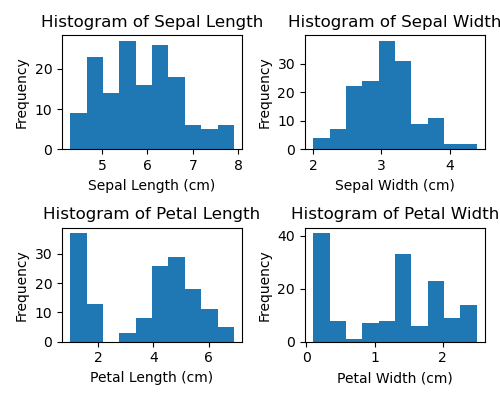

In [87]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5, 4))

# Plot SepalLengthCm
axes[0, 0].hist(df_iris['SepalLengthCm'], bins=10)
axes[0, 0].set_xlabel('Sepal Length (cm)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Histogram of Sepal Length')

# Plot SepalWidthCm
axes[0, 1].hist(df_iris['SepalWidthCm'], bins=10)
axes[0, 1].set_xlabel('Sepal Width (cm)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Histogram of Sepal Width')

# Plot PetalLengthCm
axes[1, 0].hist(df_iris['PetalLengthCm'], bins=10)
axes[1, 0].set_xlabel('Petal Length (cm)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Histogram of Petal Length')

# Plot PetalWidthCm
axes[1, 1].hist(df_iris['PetalWidthCm'], bins=10)
axes[1, 1].set_xlabel('Petal Width (cm)')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Histogram of Petal Width')

plt.tight_layout()
plt.show()


Let's take a look at Petal length 

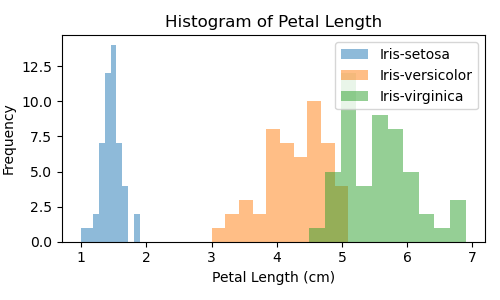

In [88]:
fig = plt.figure(figsize=(5, 3))
for species, group in df_iris.groupby('Species'):
    plt.hist(group['PetalLengthCm'], bins=10, alpha=0.5, label=species)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Length')
plt.legend()
plt.tight_layout()
plt.show()


Now let's see some social media data. Tweets about the Ukraine-Russia conflict.

In [89]:
df_ukraine = pd.read_csv('../Datasets/Ukraine_tweets.csv')
df_ukraine.head()

/var/folders/jh/xkyk5yn976z_y46xvbg2kjjm0000gn/T/ipykernel_38010/2043529792.py:1: DtypeWarning: Columns (0,1,2,3,4,5,6,7,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ukraine = pd.read_csv('../Datasets/Ukraine_tweets.csv')


,Datetime,Tweet Id,Text,Username,Permalink,User,Outlinks,CountLinks,ReplyCount,RetweetCount,LikeCount,QuoteCount,ConversationId,Language,Source,Media,QuotedTweet,MentionedUsers,hashtag,hastag_counts
0,2022-02-24 03:12:47+00:00,1496684505247141888.0,🇺🇦 Massive explosions rocks #Kharkiv. #Russia ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,2.0,17.0,47.0,1.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Photo(previewUrl='https://pbs.twimg.com/media...,NaN,NaN,"['#Kharkiv.', '#Russia', '#Ukraine', '#Ukraine...",9.0
1,2022-02-24 03:18:54+00:00,1496686044275695616.0,🇺🇦 Kharkiv is officially being struck by major...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,2.0,104.0,188.0,8.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
2,2022-02-24 03:22:42+00:00,1496687000375726080.0,🇺🇦 More angles on that strike in Kharkiv. #Rus...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,1.0,41.0,75.0,5.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0
3,2022-02-24 03:25:36+00:00,1496687731434565632.0,🇺🇦 BM-21 Grad strikes opening on #Mariupol cit...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,21.0,407.0,1099.0,149.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Mariupol', '#Russia', '#Ukraine', '#Ukraine...",9.0
4,2022-02-24 03:27:28+00:00,1496688201242759168.0,🇺🇦 Damage caused by strike in Kharkiv... #Russ...,IdeologyWars,https://twitter.com/IdeologyWars/status/149668...,https://twitter.com/IdeologyWars,NaN,NaN,7.0,152.0,207.0,22.0,1496493071495987200.0,en,"<a href=""https://mobile.twitter.com"" rel=""nofo...",[Video(thumbnailUrl='https://pbs.twimg.com/ext...,NaN,NaN,"['#Russia', '#Ukraine', '#UkraineWar', '#Russi...",8.0


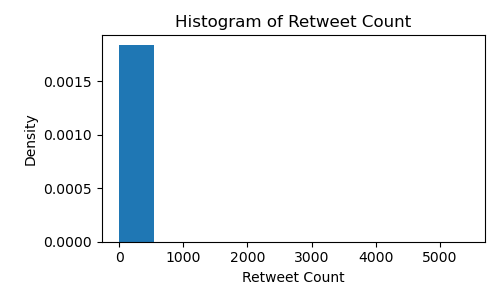

In [90]:
# distribution of number of retweets
plt.figure(figsize=(5, 3))
retweetCount = df_ukraine['RetweetCount'].dropna() # Remove missing values
plt.hist(retweetCount, density=True)
plt.xlabel('Retweet Count')
plt.ylabel('Density')
plt.title('Histogram of Retweet Count')
plt.tight_layout()
plt.show()

# increase number of bins

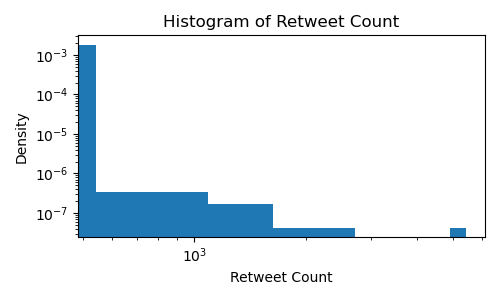

In [91]:
# distribution of number of retweets
plt.figure(figsize=(5, 3))
retweetCount = df_ukraine['RetweetCount'].dropna() # Remove missing values
plt.hist(retweetCount, density=True)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Retweet Count')
plt.ylabel('Density')
plt.title('Histogram of Retweet Count')
plt.tight_layout()
plt.show()


#logspace bins
# bins = np.logspace(1,np.log10(retweetCount.max()), 10)

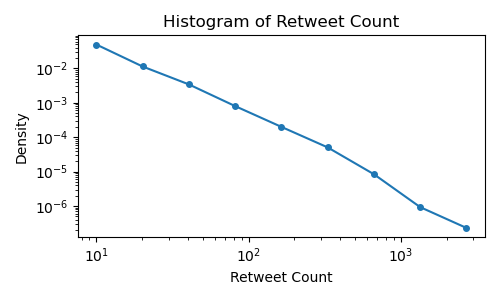

In [92]:
# distribution of number of retweets
plt.figure(figsize=(5, 3))
hist, bins = np.histogram(retweetCount, bins=np.logspace(1, np.log10(retweetCount.max()), 10),density=True)
plt.plot(bins[:-1], hist,"o-",ms=4)
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Retweet Count')
plt.ylabel('Density')
plt.title('Histogram of Retweet Count')
plt.tight_layout()
plt.show()



Now let's get back to our cars dataset and try to find some outliers.

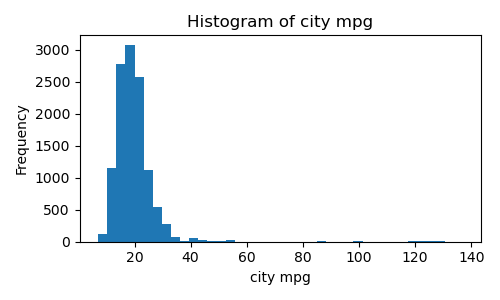

In [70]:
fig = plt.figure(figsize=(5, 3))
plt.hist(df_cars['city mpg'],bins=40)
plt.xlabel('city mpg')
plt.ylabel('Frequency')
plt.title('Histogram of city mpg')
plt.tight_layout()
plt.show()

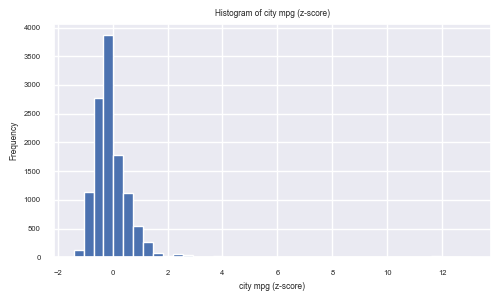

In [154]:
zscore_city_mpg = stats.zscore(df_cars['city mpg'])
# zscore_city_mpg = (df_cars['city mpg'] - df_cars['city mpg'].mean())/df_cars['city mpg'].std()
fig = plt.figure(figsize=(5, 3))
plt.hist(zscore_city_mpg,bins=40)
plt.xlabel('city mpg (z-score)')
plt.ylabel('Frequency')
plt.title('Histogram of city mpg (z-score)')
plt.tight_layout()
plt.show()


In [94]:
df_cars[zscore_city_mpg>3]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
539,FIAT,500e,2015,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,108,122,819,31800
540,FIAT,500e,2016,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
541,FIAT,500e,2017,electric,NaN,0.0,DIRECT_DRIVE,front wheel drive,2.0,Hatchback,Compact,2dr Hatchback,103,121,819,31800
1202,Honda,Accord Hybrid,2014,regular unleaded,195.0,4.0,AUTOMATIC,front wheel drive,4.0,Hybrid,Midsize,Sedan,45,50,2202,31905
1203,Honda,Accord Hybrid,2014,regular unleaded,195.0,4.0,AUTOMATIC,front wheel drive,4.0,Hybrid,Midsize,Sedan,45,50,2202,29155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9868,Chevrolet,Spark EV,2014,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,27010
9869,Chevrolet,Spark EV,2015,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,25170
9870,Chevrolet,Spark EV,2015,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,25560
9871,Chevrolet,Spark EV,2016,electric,140.0,0.0,DIRECT_DRIVE,front wheel drive,4.0,Hatchback,Compact,4dr Hatchback,109,128,1385,25510


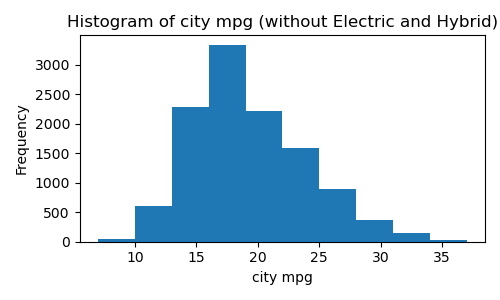

In [140]:
df_cars_filtered = df_cars[~((df_cars['Engine Fuel Type'] == 'electric') |
                        (df_cars['Market Category'].str.contains('Hybrid')))]

fig = plt.figure(figsize=(5, 3))
plt.hist(df_cars_filtered['city mpg'], bins=10)
plt.xlabel('city mpg')
plt.ylabel('Frequency')
plt.title('Histogram of city mpg (without Electric and Hybrid)')
plt.tight_layout()
plt.show()


### Correlation analysis (Multivariate exploration)
Correlations between all numeric variables in the cars dataset.

In [117]:
# calculate the correlation between city mpg and highway mpg

df_cars_filtered['city mpg'].corr(df_cars_filtered['highway MPG'])

0.8520452086020581

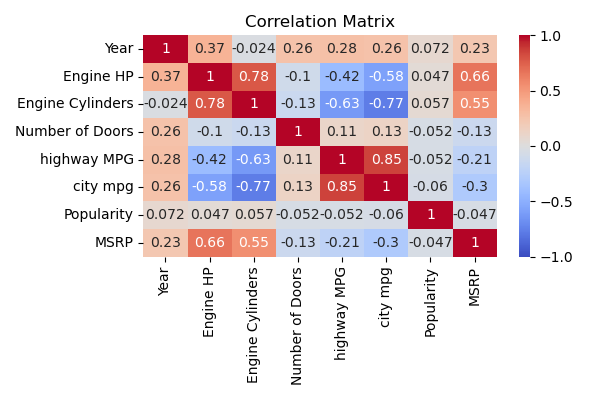

In [119]:
numeric_variables = df_cars_filtered.select_dtypes(include=np.number)
correlation_table = numeric_variables.corr()

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


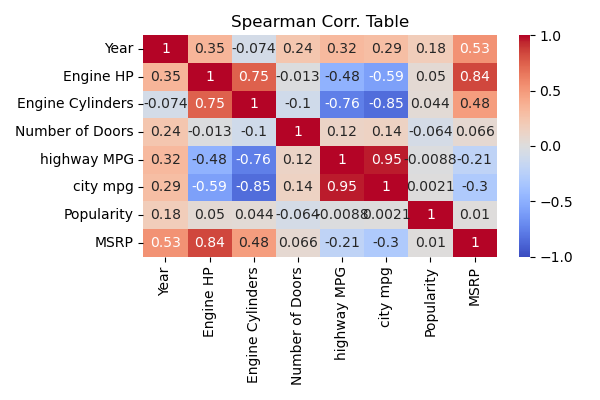

In [120]:
# same but for Spearman
correlation_table = numeric_variables.corr(method='spearman')

# Create heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_table, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Corr. Table')
plt.tight_layout()
plt.show()


In [122]:
df_anscombe = pd.read_csv('../Datasets/Anscombe_quartet_data.csv')
df_anscombe.head()

,x123,y1,y2,y3,x4,y4
0,10.0,8.04,9.14,7.46,8.0,6.58
1,8.0,6.95,8.14,6.77,8.0,5.76
2,13.0,7.58,8.74,12.74,8.0,7.71
3,9.0,8.81,8.77,7.11,8.0,8.84
4,11.0,8.33,9.26,7.81,8.0,8.47


In [126]:
df_anscombe.mean()

x123    9.000000
y1      7.500909
y2      7.500909
y3      7.500000
x4      9.000000
y4      7.500909
dtype: float64

In [129]:
df_anscombe.std()

x123    3.316625
y1      2.031568
y2      2.031657
y3      2.030424
x4      3.316625
y4      2.030579
dtype: float64

In [131]:
correlation_x123_y1 = df_anscombe['x123'].corr(df_anscombe['y1'])
correlation_x123_y2 = df_anscombe['x123'].corr(df_anscombe['y2'])
correlation_x123_y3 = df_anscombe['x123'].corr(df_anscombe['y3'])
correlation_x4_y4 = df_anscombe['x4'].corr(df_anscombe['y4'])

print('Correlation between x1 and y1: ', correlation_x123_y1)
print('Correlation between x2 and y2: ', correlation_x123_y2)
print('Correlation between x3 and y3: ', correlation_x123_y3)
print('Correlation between x4 and y4: ', correlation_x4_y4)


Correlation between x1 and y1:  0.81642051634484
Correlation between x2 and y2:  0.8162365060002428
Correlation between x3 and y3:  0.8162867394895984
Correlation between x4 and y4:  0.8165214368885028


What kind of data is in "mysterious_data.csv"?

In [137]:
df_mystery = pd.read_csv('../Datasets/mysterious_data.csv')
df_mystery.head()

,featureA,featureB
0,55.3846,97.1795
1,51.5385,96.0256
2,46.1538,94.4872
3,42.8205,91.4103
4,40.7692,88.3333


### Data Visualization

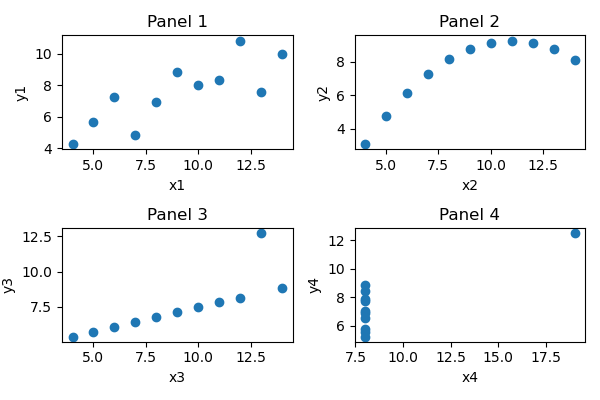

In [135]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(6, 4))

# Panel 1
axes[0, 0].plot(df_anscombe['x123'], df_anscombe['y1'], 'o')
axes[0, 0].set_xlabel('x1')
axes[0, 0].set_ylabel('y1')
axes[0, 0].set_title('Panel 1')

# Panel 2
axes[0, 1].plot(df_anscombe['x123'], df_anscombe['y2'], 'o')
axes[0, 1].set_xlabel('x2')
axes[0, 1].set_ylabel('y2')
axes[0, 1].set_title('Panel 2')

# Panel 3
axes[1, 0].plot(df_anscombe['x123'], df_anscombe['y3'], 'o')
axes[1, 0].set_xlabel('x3')
axes[1, 0].set_ylabel('y3')
axes[1, 0].set_title('Panel 3')

# Panel 4
axes[1, 1].plot(df_anscombe['x4'], df_anscombe['y4'], 'o')
axes[1, 1].set_xlabel('x4')
axes[1, 1].set_ylabel('y4')
axes[1, 1].set_title('Panel 4')

plt.tight_layout()
plt.show()


TypeError: pairplot() got an unexpected keyword argument 'figsize'

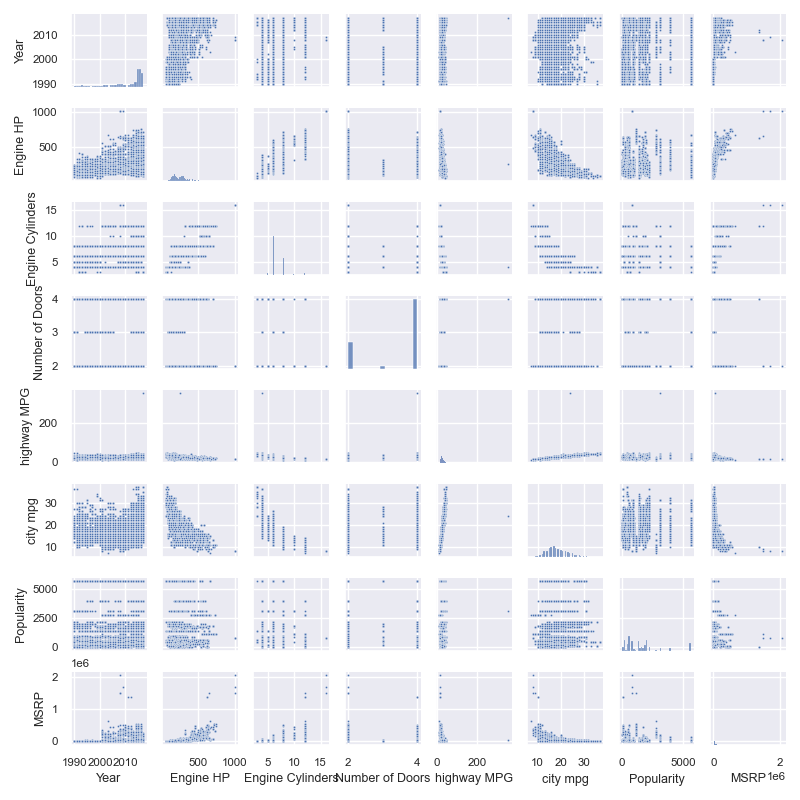

In [158]:
# Create a plot of all the combinations of numeric variables in filtered_df
df_cars_filtered_numeric = df_cars_filtered.select_dtypes(include=np.number)
sns.set(font_scale=0.75)  # Set the font scale to reduce the font size
sns.pairplot(df_cars_filtered, height=1, markers='.', plot_kws={'s': 10})
plt.show()

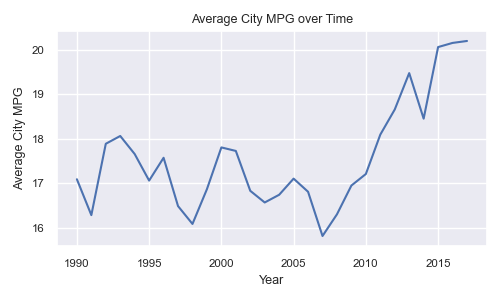

In [156]:
# Check trends of city MPG over time (average over time)
plt.figure(figsize=(5, 3))
df_cars_filtered.groupby('Year')['city mpg'].mean().plot()
plt.ylabel('Average City MPG')
plt.title('Average City MPG over Time')
plt.tight_layout()
plt.show()


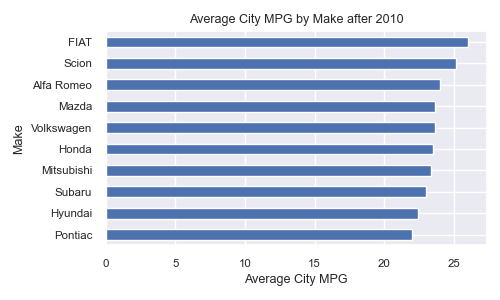

In [165]:
# plot brands with highest average city MPG after 2010
plt.figure(figsize=(5, 3))
ax = df_cars_filtered[df_cars_filtered['Year'] >= 2010].groupby('Make')['city mpg'].mean() \
    .sort_values(ascending=False).head(10).plot(kind='barh')

plt.xlabel('Average City MPG')
plt.title('Average City MPG by Make after 2010')
plt.tight_layout()

# Invert y-axis
ax.invert_yaxis()

plt.show()


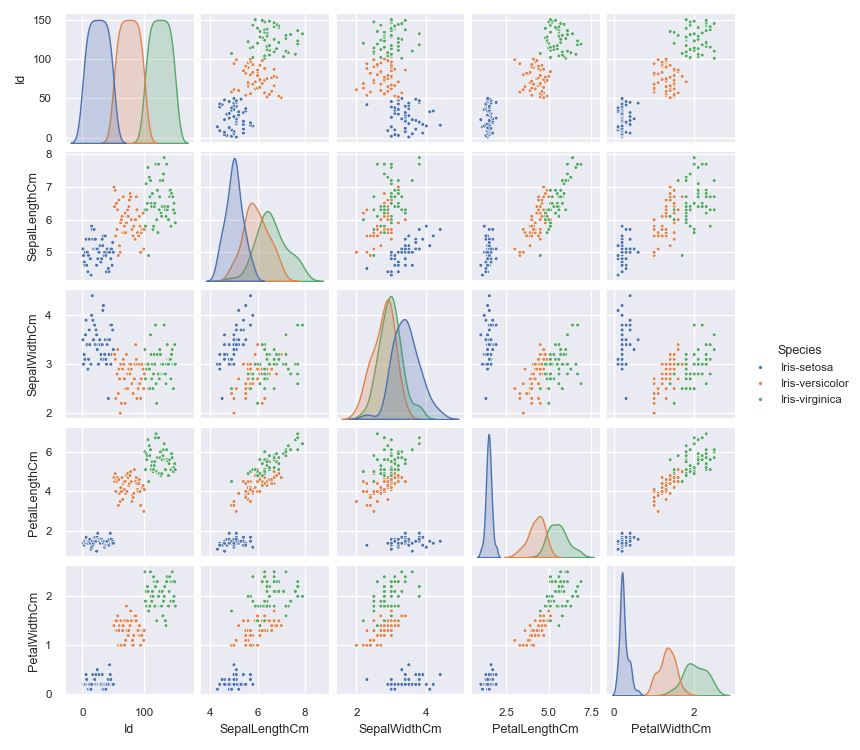

In [172]:

sns.set(font_scale=0.75)  # Set the font scale to reduce the font size
sns.pairplot(df_iris, hue='Species', height=1.5, markers='.', plot_kws={'s': 30}) 
plt.show()


        PC1       PC2      Species
0 -2.256981  0.504015  Iris-setosa
1 -2.079459 -0.653216  Iris-setosa
2 -2.360044 -0.317414  Iris-setosa
3 -2.296504 -0.573447  Iris-setosa
4 -2.380802  0.672514  Iris-setosa


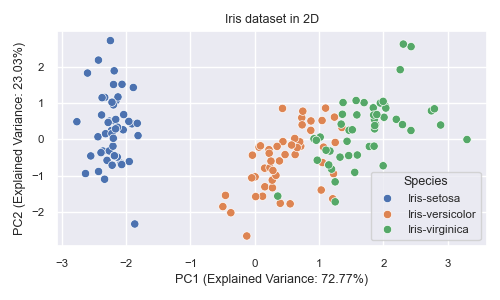

In [178]:
# Apply PCA to the iris dataset and visualize the data in 2D
pca = PCA(n_components=2)
X = df_iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
# make sure standardization is in place
X = (X - X.mean()) / X.std()
pca.fit(X)
X_pca = pca.transform(X)
df_iris_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_iris_pca['Species'] = df_iris['Species']
print(df_iris_pca.head())

# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_

# visualize
plt.figure(figsize=(5, 3))
sns.scatterplot(x='PC1', y='PC2', hue='Species', data=df_iris_pca)
plt.title('Iris dataset in 2D')
plt.xlabel('PC1 (Explained Variance: {:.2f}%)'.format(explained_variance[0] * 100))
plt.ylabel('PC2 (Explained Variance: {:.2f}%)'.format(explained_variance[1] * 100))
plt.tight_layout()
plt.show()


          PC1       PC2    Make
479 -0.444989  0.319404  Toyota
480 -0.518249  0.282277  Toyota
481 -0.501720  0.264700  Toyota
482 -0.507550  0.270900  Toyota
483 -0.550997  0.317098  Toyota


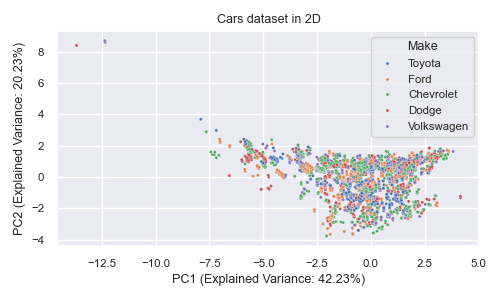

In [184]:
# Same for the cars dataset with color by make (only top 5)
pca = PCA(n_components=2)
# drop na values
isNA = df_cars_filtered_numeric.isna().any(axis=1)
X = df_cars_filtered_numeric[~isNA]
# make sure standardization is in place

X = (X - X.mean()) / X.std()
pca.fit(X)
X_pca = pca.transform(X)
df_cars_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_cars_pca['Make'] = df_cars_filtered[~isNA]['Make']
# only top brands
top_brands = df_cars_pca['Make'].value_counts().head(5).index
df_cars_pca = df_cars_pca[df_cars_pca['Make'].isin(top_brands)]

print(df_cars_pca.head())

# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_

# visualize
plt.figure(figsize=(5, 3))
sns.scatterplot(x='PC1', y='PC2', hue='Make', data=df_cars_pca,s=5)
plt.title('Cars dataset in 2D')
plt.xlabel('PC1 (Explained Variance: {:.2f}%)'.format(explained_variance[0] * 100))
plt.ylabel('PC2 (Explained Variance: {:.2f}%)'.format(explained_variance[1] * 100))
plt.tight_layout()
plt.show()
